# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.

importamos las librerías necesarias para el análisis de los datos.

In [2]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

Cargo y leo el archivo

In [3]:
titanic = pd.read_csv(os.path.join(os.getcwd(), 'titanic.csv')) 
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Hago una pequeña exploración inicial de los datos:

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Veo el número de valores nulos.

In [7]:
nulos_totales = titanic.isnull().sum()
print(f"Número de valores nulos por columna:", nulos_totales)

Número de valores nulos por columna: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Analizo los valores nulos.

In [8]:
#Calculo el porcentaje de filas con atributos nulos:
porcentaje_filas_nulas = titanic.isnull().mean() * 100
print(f"Porcentaje de filas con valores nulos por columna:", porcentaje_filas_nulas)

Porcentaje de filas con valores nulos por columna: PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [9]:
# Eliminar filas con valores nulos en las columnas 'Age' y 'Embarked'
#titanic = titanic.dropna(subset=['Age', 'Embarked'])

# Eliminar la columna 'Cabin' debido a la gran cantidad de valores nulos
#titanic = titanic.drop(columns=['Cabin'])

Hago un análisis estadístico donde calculo la edad mínima y máxima y la mediana de las edades.

In [10]:
# 4. Edad mínima y máxima
edad_minima = titanic['Age'].min()
print(f"La edad mínima es:", edad_minima)

edad_maxima = titanic['Age'].max()
print(f"La edad máxima:", edad_maxima)

mediana_edades = titanic['Age'].median()
print(f"La mediana de las edades es:", mediana_edades)

La edad mínima es: 0.42
La edad máxima: 80.0
La mediana de las edades es: 28.0


Calculo el número de pasajeros embarcados por puerto.

In [11]:
num_embarked = titanic['Embarked'].value_counts()
print(f"El número de pasajeros embarcados por puerto es de:", num_embarked) #Southampton, Cherbourg y Queenstown

El número de pasajeros embarcados por puerto es de: S    644
C    168
Q     77
Name: Embarked, dtype: int64


La distribución de sexos en las personas embarcadas.

In [12]:
# 8. Distribución de sexos en las personas embarcadas
distribucion_sexos = titanic['Sex'].value_counts()
print(f"Distribución de sexos en las personas embarcadas:", distribucion_sexos)

Distribución de sexos en las personas embarcadas: male      577
female    314
Name: Sex, dtype: int64


Actualizo los precios de 1912 para igualarlos al valor actual.

Información extraída de: https://www.bankofengland.co.uk/monetary-policy/inflation/inflation-calculator

In [13]:
titanic['Fare'] = titanic['Fare'] * 95.42
titanic.round(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,691.80,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,6801.85,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,756.20,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,5066.80,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,768.13,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,1240.46,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,2862.60,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,2237.60,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,2862.60,C148,C


Calculo los precios más altos y más bajos de las tarifas.

In [14]:
fare_max = titanic['Fare'].max()
print(f"El precio máximo de la tarifa en Fare es de:", fare_max)

fare_min = titanic['Fare'].min()
print(f"El precio mínimo de la tarifa en Fare es de:", fare_min)

El precio máximo de la tarifa en Fare es de: 48886.452264
El precio mínimo de la tarifa en Fare es de: 0.0


Creo la columna 'lastname' para guardar el apellido de los pasajeros

In [15]:
titanic['LastName'] = titanic['Name'].apply(lambda x: x.split(',')[0]) 
# Vamos a normalizar Fare para asegurarnos que no tenga un impacto desproporcionado
#scaler = StandardScaler() #Creo el objeto scaler
#titanic['Fare'] = scaler.fit_transform(titanic[['Fare']]) #Normalizo la columna Fare
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,691.795000,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,6801.852486,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,756.203500,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,5066.802000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,768.131000,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,1240.460000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,2862.600000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,2237.599000,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,2862.600000,C148,C,Behr


La columna Age está como float, por lo que la modifico a int

In [16]:
titanic['Age'] = titanic['Age'].fillna(0) #Rellenamos los valores nulos con 0.
titanic['Age'] = titanic ['Age'].astype(int) #Convertimos la columna Age a entero.
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,691.795000,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,6801.852486,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,756.203500,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,5066.802000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,768.131000,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,1240.460000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,2862.600000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,2237.599000,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,2862.600000,C148,C,Behr


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  LastName     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(6)
memory usage: 87.1+ KB


GRÁFICO DE DISPERSIÓN:

Con este gráfico podemos observar si existe relación entre la tarifa y la edad de los pasajeros y su supervivencia ya que los puntos están coloreados indicando si sobrevivieron o no.


In [18]:
fig=px.scatter(titanic, x='Age', y='Fare', color='Survived', 
               title='Edad vs Tarifa por supervivencia', 
               labels={'Age':'Edad', 'Fare':'Tarifa', 'Survived':'Sobreviviente'})
fig.show()

En el gráfico podemos observar una gran concentración de puntos entre los 20 y 40 años y las tarifas en el primer rango.

La mayoría de puntos que representan a los supervivientes están en un grado de tarifas más altas, por lo que los que pagaron más por sus boletos tenían una mayor probabilidad de sobrevivir.


GRÁFICO DE VIOLÍN:

Creo un gráfico de violín para mostrar cómo se distribuyen las edades de los pasajeros en cada clase (1ª, 2ª y 3ª) por género.

Cada violín representa la densidad de probabilidad de edad de los pasajeros en una clase y género. Cuanto más ancho es el violín mayor es la densidad de pasajeros para esa edad.

Además añado una caja dentro del violín para representar los valores estadísticos como mediana, rango intercuartílico y valores atípicos.

In [19]:
fig = px.violin(titanic, x='Pclass', y='Age', color='Sex', 
                title='Distribución de la Edad por Género y Clase',
                labels={'Pclass': 'Clase', 'Age': 'Edad', 'Sex': 'Género'})
fig.show()

Con este gráfico podemos observar como la distribución de edad varía entras las diferentes clases. En primera clase la distribución por edad es más amplia y desplazada hacia edades mayores en comparación con tercera clase, donde hay pasajeros más jóvenes.


1ª clase: En hombres los rangos de edad están en torno a 30-50 mientras que las mujeres tienen un violín más estrecho y desplazado hacia edades más jóvenes (20-40).

También obeservamos que las mujeres de primera clase son más jóvenes que los hombres.

2ª clase: La distribución de los hombres es más estrecha (20-40 años) y la de las mujeres es similar pero con tendencia a edades menores.

3ª clase: Los hombres tienen una amplia distribución en rangos de 10 a 50 años, mientras que en las mujeres está desplazado a edades comprendidas entre 10 y 30 años.

GRAFICO INTERACTIVO DE BARRAS POR SUPERVIVENCIA POR CLASE Y GÉNERO

In [20]:
fig_bar = px.bar(titanic, x='Pclass', y='Survived', color='Sex', barmode='group', 
                 title='Tasa de Supervivencia por Clase y Género')
fig_bar.show()

In [21]:
titanic['LastName']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: LastName, Length: 891, dtype: object

FILTRO POR APELLIDO:

In [22]:
# Crear un filtro interactivo para seleccionar un apellido
seleccion_apellido = input('Selecciona un apellido: ')

# Filtrar los pasajeros por el apellido seleccionado
filtro_pasajero = titanic[titanic['LastName'] == seleccion_apellido]

# Mostrar los pasajeros con el apellido seleccionado y su estado de supervivencia
if not filtro_pasajero.empty:
    print(f"Personas con el apellido '{seleccion_apellido}':")
    print(filtro_pasajero[['Name', 'Survived']])
else:
    print(f"No se encontraron pasajeros con el apellido '{seleccion_apellido}'.")

Personas con el apellido 'Sage':
                                  Name  Survived
159         Sage, Master. Thomas Henry         0
180       Sage, Miss. Constance Gladys         0
201                Sage, Mr. Frederick         0
324           Sage, Mr. George John Jr         0
792            Sage, Miss. Stella Anna         0
846           Sage, Mr. Douglas Bullen         0
863  Sage, Miss. Dorothy Edith "Dolly"         0


STREAMLIT

In [51]:
#columnas =['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked', "Age"] #Selecciono las columnas que voy a utilizar

# Aplicamos OneHotEncoder para codificar nuestras variables categóricas 
#encoder = OneHotEncoder(drop='first', sparse_output=False) #Creo el objeto encoder
#titanic_encoded = pd.DataFrame(encoder.fit_transform(titanic[columnas])) #Codifico las columnas seleccionadas
#titanic_encoded.columns = encoder.get_feature_names_out(columnas) #Asigno los nombres de las columnas

In [52]:
# Creamos dos dataframes basados en la presencia de Age
#titanic_encoded['Age'] = titanic['Age'] #Añadimos la columna Age
#titanic_with_age = titanic_encoded.dropna(subset=['Age']) #Eliminamos las filas con valores NaN en la columna Age
#titanic_without_age = titanic_encoded[titanic_encoded['Age'].isna()].drop(columns='Age') #
# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba

In [53]:
#titanic_with_age = titanic_with_age.fillna(titanic_with_age.mean()) #Relleno los valores NaN con la media
#titanic_with_age = titanic_with_age.astype(int) #Convierto los valores a enteros
#titanic_with_age

In [54]:
 #Divido el conjunto de datos en entrenamiento y prueba para su modelado y evaluación.
#X_train, X_test, y_train, y_test = train_test_split(titanic_with_age.drop(columns='Age'), titanic_with_age['Age'], test_size=0.2, random_state=357)
#test_size=0.2 indica que el 20% de los datos se utilizarán para pruebas y el 80% restante se utilizará para entrenamiento.

In [55]:
# Lista para almacenar los valores de MSE (Error Cuadrático Medio)
#mse = []

# Rango de k para probar
#k_range = range(1, 7)

#for k in k_range:
 #   knn = KNeighborsRegressor(n_neighbors=k)
    
    # Realizamos la validación cruzada para obtener una medida más robusta del error
    """  estamos tomando el negativo de los valores devueltos para obtener el MSE real. 
         Luego, añadimos la media de estos valores a nuestra lista de MSE para cada valor de k (mse.append(scores.mean())).
    """
  #  scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
   # mse.append(scores.mean())
   # print(f'scores = {scores}')

IndentationError: unexpected indent (3808556483.py, line 11)

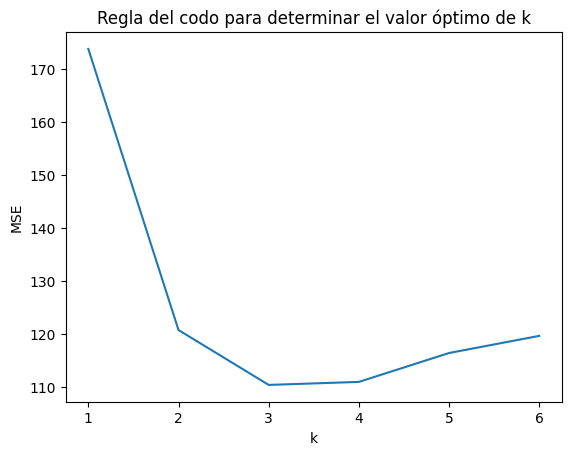

In [ ]:
# Graficamos los valores 
#plt.plot(k_range, mse)
#plt.xlabel('k')
#plt.ylabel('MSE')
#plt.title('Regla del codo para determinar el valor óptimo de k')
#plt.show()

In [ ]:
# Determinar el mejor valor de k
#best_k = k_range[mse.index(min(mse))] #Uso la métrica del error cuadrático medio
#print(f'Mejor número K: {best_k}')

Mejor número K: 3


In [ ]:
# Creamos el modelo KNN con el mejor valor de k
#knn = KNeighborsRegressor(n_neighbors=best_k)

# Ajustamos el modelo a los datos sin valores nulos
#knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
#imputed_ages = knn.predict(titanic_without_age)
#titanic.loc[titanic['Age'].isna(), 'Age'] = imputed_ages 